In [30]:
from model import BotDemineur
from env import DemineurInterface
import torch

from captum.attr import LRP

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
rows = 9
cols = 9
env = DemineurInterface(rows, cols)

cpu


In [16]:
n_actions = env.action_space_nb

model = BotDemineur(rows, cols, n_actions).to(device)
state_dict = torch.load('weights/9-9-3200.pt')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [56]:
state = env.get_state()


lrp = LRP(model)

output = model(state)
target = output.max(1)[1].item()


i,j = target // env.grid.cols, target % env.grid.cols
print(i, j)


attribution = lrp.attribute(state, target=target)

5 3


tensor([[[[4.4899e+01, 7.2642e+02, 8.1056e+02, 1.9487e+02, 1.6151e+03,
           2.6342e+02, 9.2553e+02, 1.1536e+02, 2.1061e+02],
          [2.5694e+02, 5.8818e+02, 7.1107e+02, 7.6879e+02, 8.1931e+02,
           2.9464e+02, 3.3883e+02, 1.2919e+03, 1.1509e+03],
          [8.2324e+00, 1.9579e+02, 1.3162e+02, 3.2382e+01, 1.1847e+01,
           2.0541e+02, 6.0314e+02, 8.3431e+02, 1.6153e+02],
          [7.2597e+01, 5.6244e+02, 2.7403e+02, 3.7985e+02, 3.1810e+02,
           5.0458e+02, 8.0781e+01, 3.4756e+02, 1.7039e+02],
          [2.8244e+02, 4.8847e+02, 1.0873e+03, 4.1850e+02, 1.8013e+03,
           4.4046e+02, 5.1328e+02, 6.6378e+02, 4.2461e-01],
          [5.7384e+02, 3.6184e+02, 1.0359e+02, 1.1314e+03, 2.5967e+03,
           4.6655e+02, 9.9423e+02, 1.2530e+02, 1.7135e+03],
          [1.8065e+02, 3.7213e+02, 2.0234e+03, 2.3033e+03, 5.3556e+02,
           2.4553e+03, 8.2695e+02, 1.2666e+03, 7.0278e+02],
          [9.6067e+01, 1.3863e+03, 1.4987e+02, 6.5052e+02, 1.2249e+02,
           4

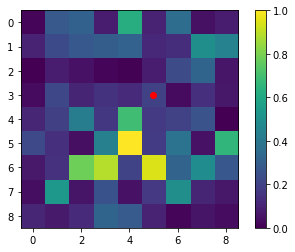

In [57]:
print(attribution.abs())

plt.imshow(attribution.abs().detach().numpy().squeeze())
plt.scatter(i,j, color='r')
plt.colorbar()